In [201]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: C:\Users\fleon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: C:\Users\fleon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com



[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: C:\Users\fleon\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
class HeartFailureDataSet:
    def __init__(self):
        self.data = pd.read_csv("heart_failure_clinical_records.csv")
        self.x = self.data[["age", "anaemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "sex", "smoking","time"]]
        self.y = self.data["DEATH_EVENT"]
        self.numeric_columns = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.x, self.y, random_state=104, test_size=0.2, shuffle=True) 
        self.scaler = StandardScaler()
        self.scaler = self.scaler.fit(self.X_train[self.numeric_columns])
        self.X_train[self.numeric_columns] = self.scaler.transform(self.X_train[self.numeric_columns])  
        self.X_test[self.numeric_columns] = self.scaler.transform(self.X_test[self.numeric_columns])  

    def get_training_data(self):
        return self.X_train.copy(), self.y_train.copy()

    def get_test_data(self):
        return self.X_test.copy(), self.y_test.copy()
    
    def get_numeric_columns(self):
        return self.numeric_columns
        
    def get_statistics(self):
        return self.data.describe()

    def get_y_balance(self):
        return self.y.sum() / self.y.count()

    def get_description(self):
        return """This dataset contains the medical records of 5000 patients who had heart failure, 
        collected during their follow-up period, where each patient profile has 13 clinical features."""

In [2]:
class IBaseModel:
    def __init__(self):
        pass

    def train(self):
        pass

    def get_probabilities(self):
        pass
        
    def get_predictions(self):
        pass

In [7]:
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

class ModelMetrics:
    def __init__(self, model: IBaseModel, data: HeartFailureDataSet):
        print(model)
        self.model = model
        if not self.model.trained: self.model.train()  
        self.data = data
        self.x_test, self.y_test = self.data.get_test_data();
        self.x_train, self.y_train = self.data.get_training_data();
        
    def get_prf(self):
        prediction = self.model.get_predictions(self.x_test)
        precision_0, recall_0, f1_0, support_0 = precision_recall_fscore_support(self.y_test, prediction, average='binary', pos_label=0)
        precision_1, recall_1, f1_1, support_1 = precision_recall_fscore_support(self.y_test, prediction, average='binary', pos_label=1)
        return {
            "Class 0":{
                "Precision": precision_0,
                "Recall": recall_0,
                "F1": f1_0
            },
            "Class 1":{
                "Precision": precision_1,
                "Recall": recall_1,
                "F1": f1_1
            }
        }

    def show_ROC(self):
        probability = self.model.get_probabilities(self.x_test)
        false_pos_0, true_pos_0, discard = roc_curve(self.y_test, probability[:, 0], pos_label=0)
        auc_0 = auc(false_pos_0, true_pos_0)
        
        false_pos_1, true_pos_1, discard = roc_curve(self.y_test, probability[:, 1], pos_label=1)
        auc_1 = auc(false_pos_1, true_pos_1)
        
        plt.plot(false_pos_0, true_pos_0, marker='.', label='Class 0', color='b')
        plt.plot(false_pos_1, true_pos_1, marker='.', label='Class 1', color='r')
        plt.xlabel('False Positive')
        plt.ylabel('True Positive')
        plt.title(self.model.name)
        plt.legend()
        plt.show()

    def show_learning_curve(self):
        train_sizes, train_scores, test_scores = learning_curve(self.model.model, self.x_train, self.y_train)
        plt.plot(train_sizes, np.mean(train_scores, axis=1),marker='.',color='b', label='Training Scores')
        plt.plot(train_sizes, np.mean(test_scores, axis=1),marker='.',color='orange', label='Testing Scores')
        plt.title(self.model.name)
        plt.xlabel('Training Sample Volume')
        plt.ylabel('Accuracy Percentage')
        plt.legend()
        plt.show()
    

In [4]:
from sklearn.linear_model import LogisticRegressionCV
class LogisticRegressionL2(IBaseModel):
    def __init__(self, x, y, C:int, cv:int=10):
        self.model = LogisticRegressionCV(penalty="l2", cv=cv, Cs=C)
        self.X_train = x
        self.y_train = y
        self.trained = False
        self.name = "LogisticRegressionL2"
    
    def train(self):
        assert len(self.X_train) == len(self.y_train)
        self.model.fit(self.X_train, self.y_train)
        self.Trained = True

    def get_probabilities(self, x):
        return self.model.predict_proba(x)

    def get_predictions(self, x):
        return self.model.predict(x)

In [8]:
data = HeartFailureDataSet()
x_train, y_train = data.get_training_data()
x_test, y_test = data.get_test_data()
lrl2 = LogisticRegressionL2(x_train, y_train, 100)
lrlreval = ModelMetrics(lrl2, data)
lrlreval.get_prf()

{'Class 0': {'Precision': 0.8571428571428571,
  'Recall': 0.9369627507163324,
  'F1': 0.8952772073921971},
 'Class 1': {'Precision': 0.8143459915611815,
  'Recall': 0.6390728476821192,
  'F1': 0.7161410018552876}}

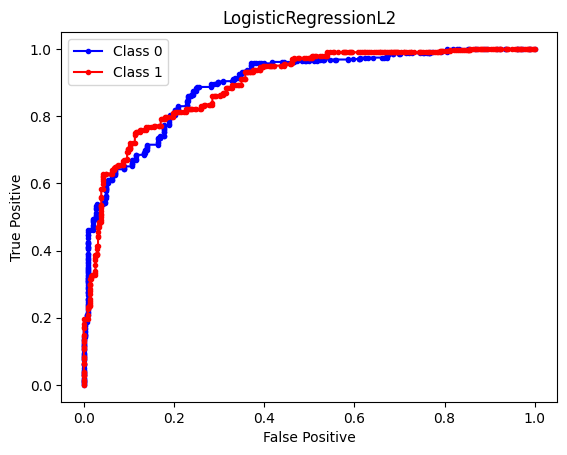

In [9]:
lrlreval.show_ROC()

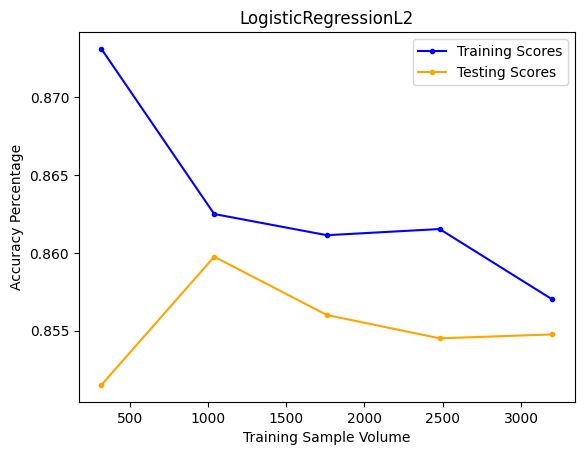

In [10]:
lrlreval.show_learning_curve()

In [11]:
from sklearn.svm import NuSVC
class NuSupportSVC(IBaseModel):
    def __init__(self, x, y):
        self.model = NuSVC(kernel="linear", gamma='auto', probability=True)
        self.X_train = x
        self.y_train = y
        self.trained = False
        self.name = "NuSupportVectorClassifier"
    
    def train(self):
        assert len(self.X_train) == len(self.y_train)
        self.model.fit(self.X_train, self.y_train)
        self.Trained = True

    def get_probabilities(self, x):
        return self.model.predict_proba(x)

    def get_predictions(self, x):
        return self.model.predict(x)

In [13]:
nvsc = NuSupportSVC(x_train, y_train)
nsvcEval = ModelMetrics(nvsc, data)
nsvcEval.get_prf()

{'Class 0': {'Precision': 0.8337531486146096,
  'Recall': 0.9484240687679083,
  'F1': 0.8873994638069705},
 'Class 1': {'Precision': 0.8252427184466019,
  'Recall': 0.5629139072847682,
  'F1': 0.6692913385826771}}

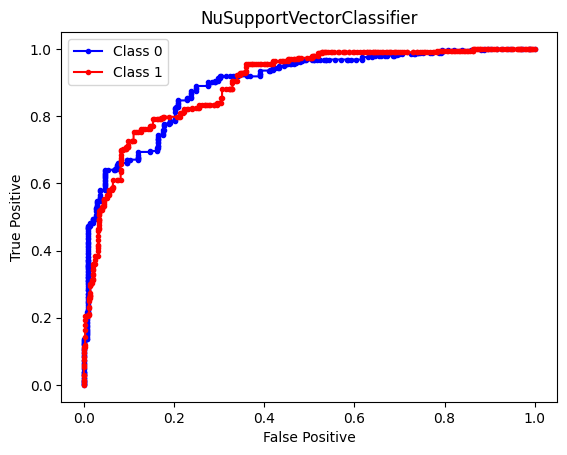

In [14]:
nsvcEval.show_ROC()

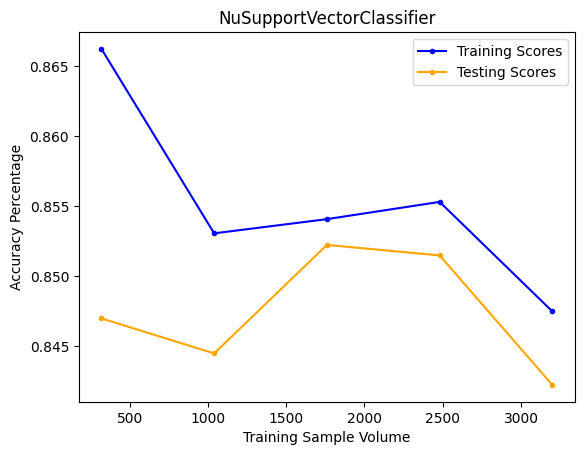

In [15]:
nsvcEval.show_learning_curve()

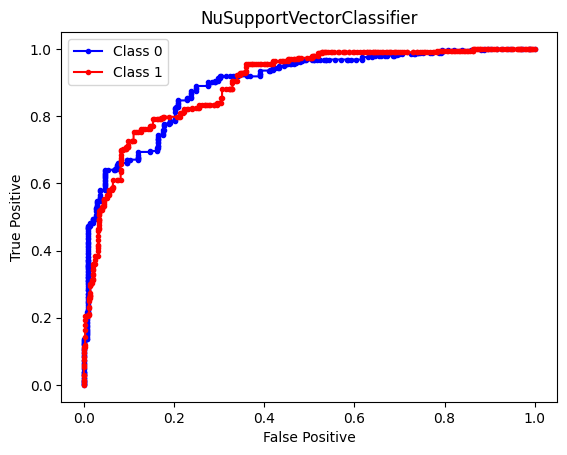

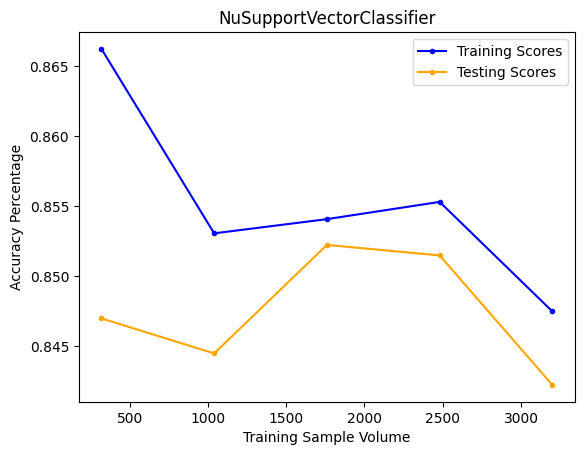

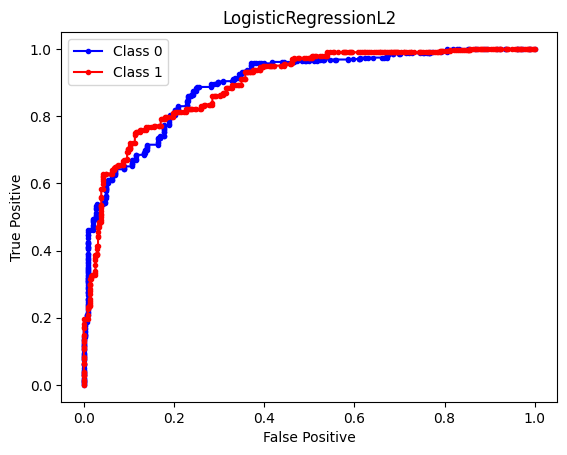

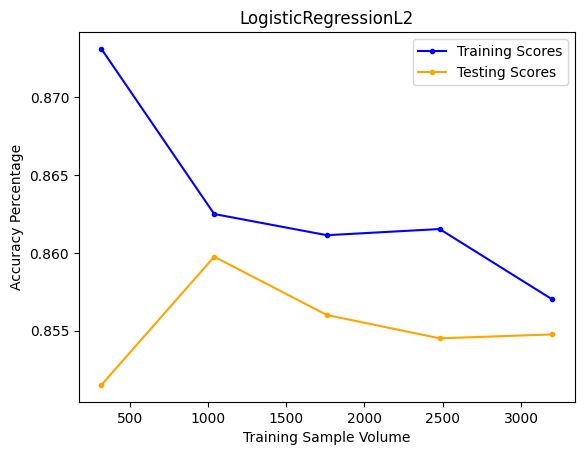

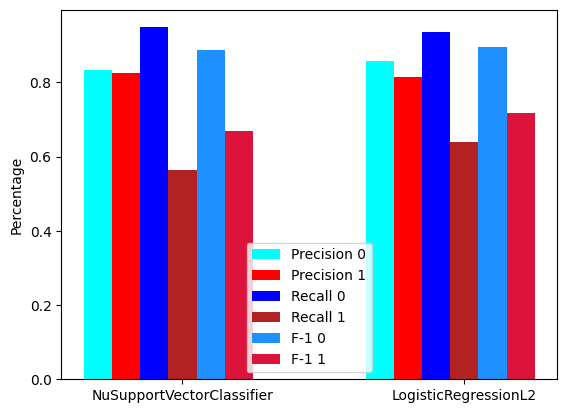

In [16]:
evaluators = [nsvcEval, lrlreval]
p_0 = []; r_0 = []; f_0 = []
p_1 = []; r_1 = []; f_1 = []
names = []
for evaluator in evaluators:
    evaluator.show_ROC()
    evaluator.show_learning_curve()
    prf = evaluator.get_prf()
    p_0.append(prf["Class 0"]["Precision"]); r_0.append(prf["Class 0"]["Recall"]); f_0.append(prf["Class 0"]["F1"])
    p_1.append(prf["Class 1"]["Precision"]); r_1.append(prf["Class 1"]["Recall"]); f_1.append(prf["Class 1"]["F1"])
    names.append(evaluator.model.name)

x_label = np.arange(len(names)) 
width = 0.1

plt.bar(x_label-(width*3), p_0, width, color='cyan') 
plt.bar(x_label-(width*2), p_1, width, color='red') 
plt.bar(x_label-(width), r_0, width, color='blue') 
plt.bar(x_label, r_1, width, color='firebrick') 
plt.bar(x_label+(width), f_0, width, color='dodgerblue') 
plt.bar(x_label+(width*2), f_1, width, color='crimson') 
plt.xticks(x_label, names)
plt.ylabel("Percentage") 
plt.legend(["Precision 0", "Precision 1", "Recall 0", "Recall 1", "F-1 0", "F-1 1"]) 
plt.show()

In [111]:
data.X_test

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
3570,0.643015,1,0.443287,1,-0.227536,0,0.053020,-0.264553,-0.632654,1,0,0.848891
1086,-0.717669,1,-0.547030,1,-0.227536,0,-0.654100,0.027709,-0.181363,0,0,-0.145198
2871,0.983186,0,-0.476073,1,1.079393,1,-0.498118,-0.361973,-0.632654,1,0,-1.268390
2499,1.663528,0,-0.454477,1,0.033849,0,-1.215637,0.514811,1.623801,1,1,-1.397492
127,1.833613,1,-0.216925,1,1.079393,1,0.572962,-0.361973,1.849447,0,0,-1.307120
...,...,...,...,...,...,...,...,...,...,...,...,...
2510,-0.037327,0,2.124666,1,-0.663179,0,0.406581,0.904493,0.044283,1,0,-1.307120
1570,-0.887754,1,-0.443165,1,-0.663179,0,0.375384,-0.167132,0.269928,0,0,-1.320031
3222,-1.312968,1,1.322540,1,-0.227536,0,-0.414927,-0.459394,0.269928,1,0,-0.558326
379,0.047716,1,-0.520293,0,-0.663179,1,-1.444411,-0.459394,1.849447,0,0,-0.274301
